In [15]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ariad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------- ------------- 5.2/8.1 MB 26.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 23.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ariad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


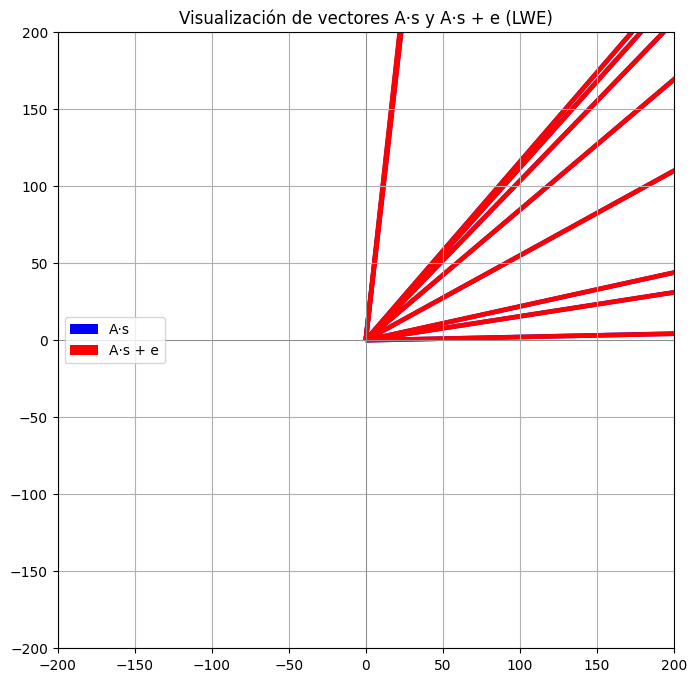

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
q = 97
n = 2    # dimensión (para poder graficar)
m = 10   # número de vectores
error_bound = 3

# Vector secreto
s = np.random.randint(0, q, size=(n,))

# Generamos A como una matriz de vectores aleatorios
A = np.random.randint(0, q, size=(m, n))

# Calculamos y = A*s y b = A*s + e
ys = []
bs = []

for i in range(m):
    ai = A[i]
    yi = np.dot(ai, s)
    ei = np.random.randint(-error_bound, error_bound + 1)
    bi = yi + ei
    ys.append(ai * s)  # Este no es exactamente el producto escalar, sino un vector escalado
    bs.append(ai * s + ei)  # Agregamos el error como desplazamiento vectorial

# Convertimos listas a arrays
ys = np.array(ys)
bs = np.array(bs)

# Graficamos
plt.figure(figsize=(8, 8))
origin = np.zeros((m, 2))

# Vectores sin error
plt.quiver(*origin.T, ys[:,0], ys[:,1], color='blue', angles='xy', scale_units='xy', scale=1, label='A·s')

# Vectores con error
plt.quiver(*origin.T, bs[:,0], bs[:,1], color='red', angles='xy', scale_units='xy', scale=1, label='A·s + e')

# Líneas que conectan A·s y A·s+e (visualización del error)
for i in range(m):
    plt.plot([ys[i,0], bs[i,0]], [ys[i,1], bs[i,1]], 'k--', linewidth=0.8)

plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Visualización de vectores A·s y A·s + e (LWE)")
plt.legend()
plt.grid(True)
plt.show()

